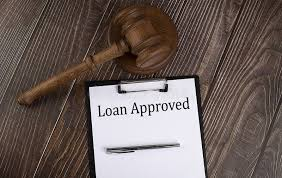

# **IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC

# **read data**

In [ ]:
df=pd.read_csv('/content/loan_data.csv')
df.head()

person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

# **Clean data**

In [ ]:
cols_to_convert = ['loan_amnt', 'person_age','person_income','cb_person_cred_hist_length']
for col in cols_to_convert:
   df[col] = df[col].astype('Int64')

In [ ]:
print(f"num of missing values = {df.isna().sum().sum()}")
df.isna().sum()

num of missing values = 0


person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

# **It's great that there are no missing values! üòé**

In [ ]:
print(f"num of dublicate rows = {df.duplicated().sum().sum()}")

num of dublicate rows = 0


# **EDA / Univariate Analysis**

In [ ]:
num_col=df.select_dtypes(include='number').columns
cat_col=df.select_dtypes(exclude='number').columns

In [ ]:
df.describe().T

count          mean           std     min  \
person_age                  45000.0     27.764178      6.045108    20.0   
person_income               45000.0  80319.053222  80422.498632  8000.0   
person_emp_exp              45000.0      5.410333      6.063532     0.0   
loan_amnt                   45000.0   9583.157556   6314.886691   500.0   
loan_int_rate               45000.0     11.006606      2.978808    5.42   
loan_percent_income         45000.0      0.139725      0.087212     0.0   
cb_person_cred_hist_length  45000.0      5.867489      3.879702     2.0   
credit_score                45000.0    632.608756     50.435865   390.0   
loan_status                 45000.0      0.222222      0.415744     0.0   

                                25%      50%       75%        max  
person_age                     24.0     26.0      30.0      144.0  
person_income               47204.0  67048.0  95789.25  7200766.0  
person_emp_exp                  1.0      4.0       8.0      125.0  
loan_amnt                    5000.0   8000.0  12237.25    35000.0  
loan_int_rate                  8.59    11.01     12.99       20.0  
loan_percent_income            0.07     0.12      0.19       0.66  
cb_person_cred_hist_length      3.0      4.0       8.0       30.0  
credit_score                  601.0    640.0     670.0      850.0  
loan_status                     0.0      0.0       0.0        1.0

# **It seems some columns have illogical values, like age and income‚Äîlet's verify! ü§î**

In [ ]:
sns.set_style('darkgrid')
def visula_numcol(df,num_col):
 for col in num_col:
  if col!='loan_status':
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

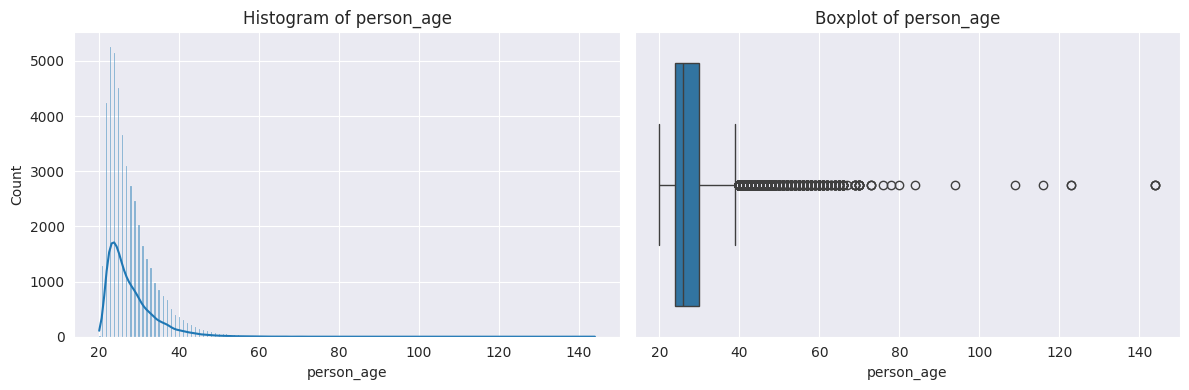

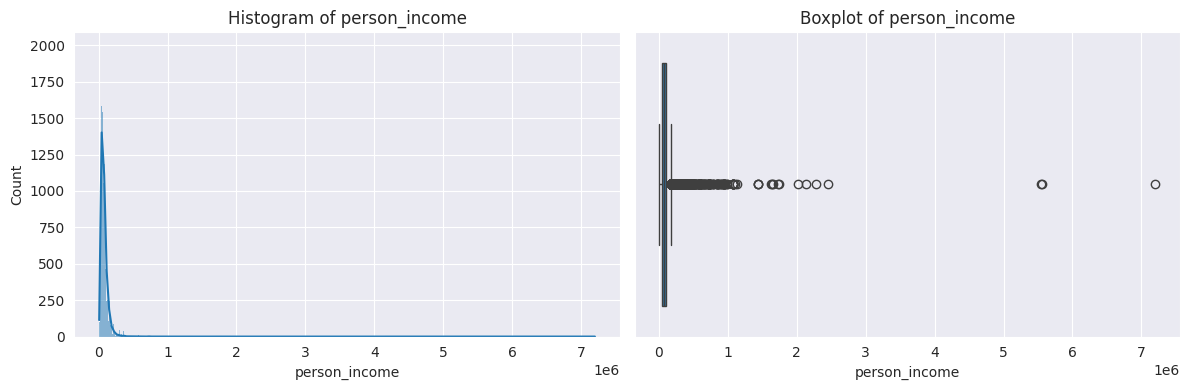

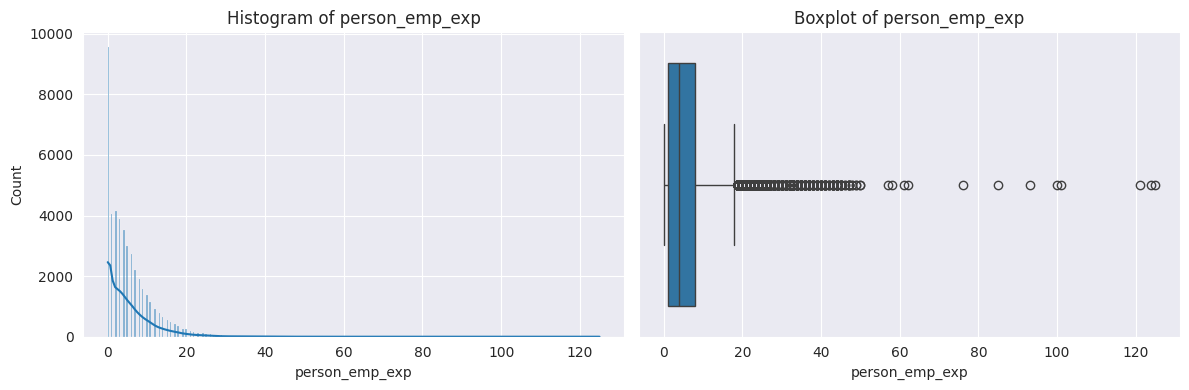

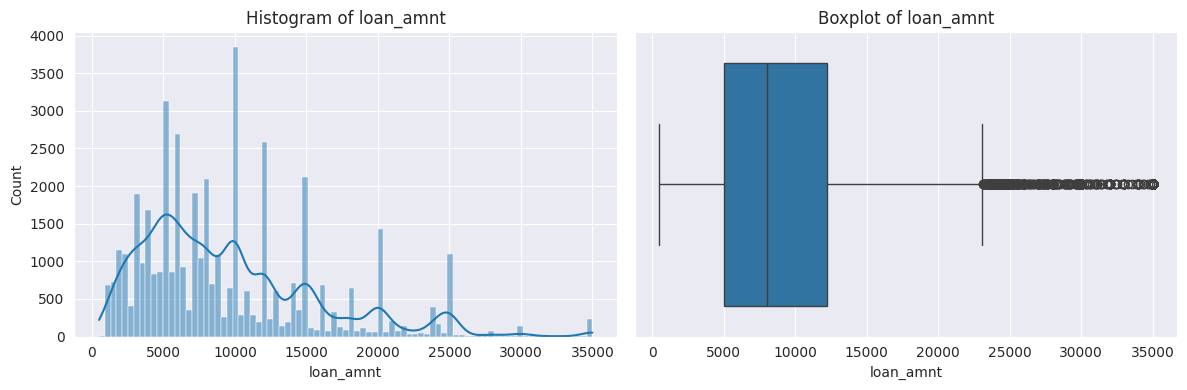

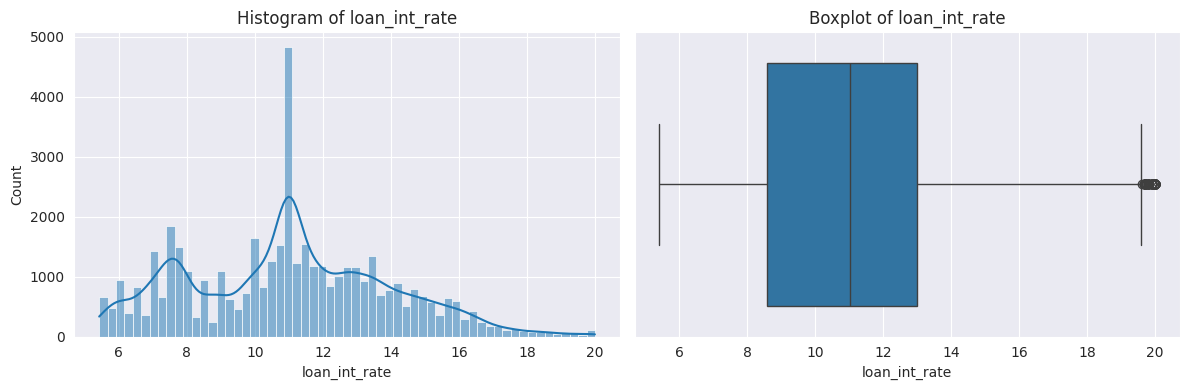

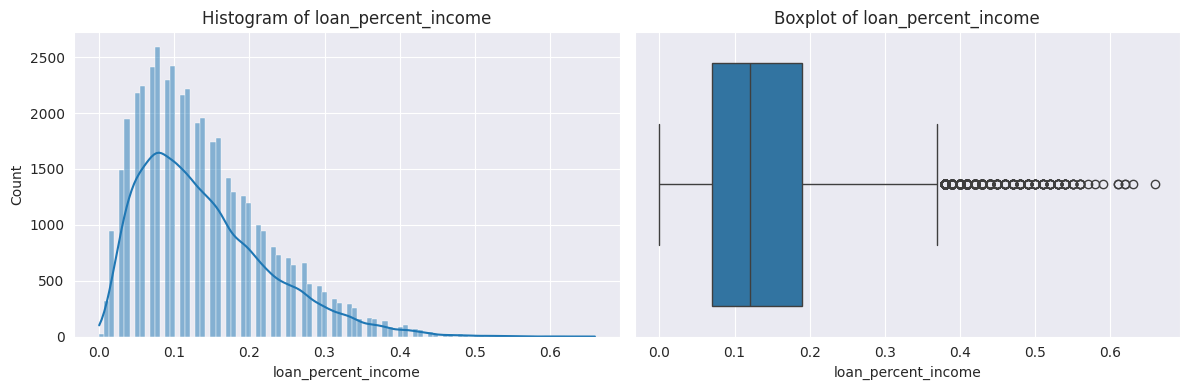

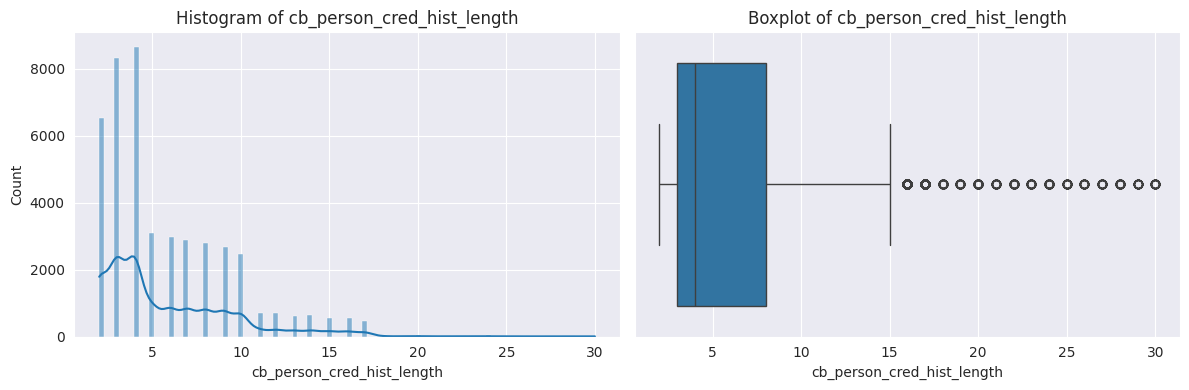

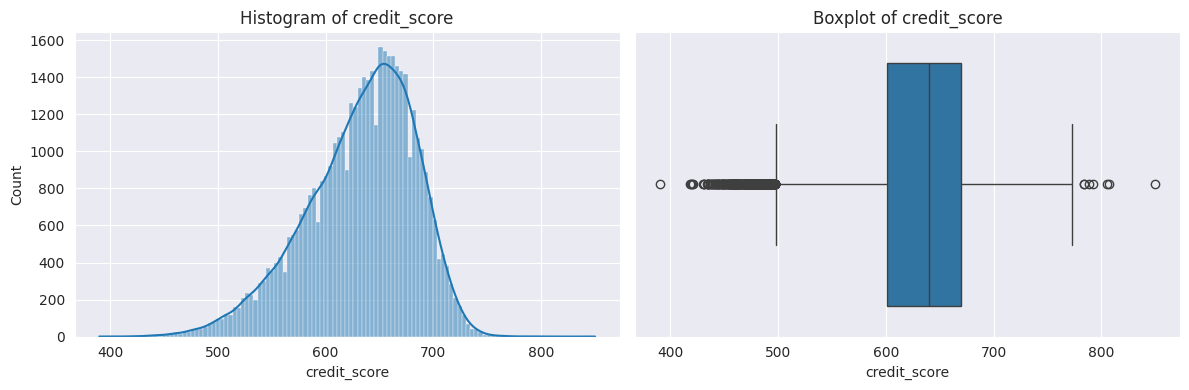

In [ ]:
visula_numcol(df,num_col)

# **Indeed, it looks like there‚Äôs a significant amount of outlier values! üòÆ**

In [ ]:
def handle_outlier(df, num_cols, strategy='replace'):
 outlier_report = []
 for col in num_cols:
   if col!='loan_status':
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower) | (df[col] > upper)]
        n_outliers = outliers.shape[0]

        outlier_report.append({
            'column': col,
            'outliers_found': n_outliers,
            'lower_bound': lower,
            'upper_bound': upper
        })

        if strategy == 'replace':
            median = df[col].median()
            df[col] = np.where((df[col] < lower) | (df[col] > upper), median, df[col])

        elif strategy == 'remove':
            df = df[~((df[col] < lower) | (df[col] > upper))]

 report_df = pd.DataFrame(outlier_report)
 return  report_df

In [ ]:
handle_outlier(df,num_col,strategy='replace')

column  outliers_found  lower_bound  upper_bound
0                  person_age            2188       15.000       39.000
1               person_income            2218   -25673.875   168667.125
2              person_emp_exp            1724       -9.500       18.500
3                   loan_amnt            2348    -5855.875    23093.125
4               loan_int_rate             124        1.990       19.590
5         loan_percent_income             744       -0.110        0.370
6  cb_person_cred_hist_length            1366       -4.500       15.500
7                credit_score             467      497.500      773.500

In [ ]:
df.describe().T

count          mean           std      min  \
person_age                  45000.0     26.812644      4.185092    20.00   
person_income               45000.0  70668.706667  31651.673019  8000.00   
person_emp_exp              45000.0      4.614800      4.396140     0.00   
loan_amnt                   45000.0   8623.517178   4872.281839   500.00   
loan_int_rate               45000.0     10.982034      2.941660     5.42   
loan_percent_income         45000.0      0.134709      0.078880     0.00   
cb_person_cred_hist_length  45000.0      5.434622      3.149065     2.00   
credit_score                45000.0    634.244200     47.837372   498.00   
loan_status                 45000.0      0.222222      0.415744     0.00   

                                 25%       50%       75%        max  
person_age                     24.00     26.00     29.00      39.00  
person_income               47204.00  67048.00  88573.00  168653.00  
person_emp_exp                  1.00      4.00      7.00      18.00  
loan_amnt                    5000.00   8000.00  12000.00   23050.00  
loan_int_rate                   8.59     11.01     12.99      19.59  
loan_percent_income             0.07      0.12      0.18       0.37  
cb_person_cred_hist_length      3.00      4.00      7.00      15.00  
credit_score                  603.00    640.00    670.00     773.00  
loan_status                     0.00      0.00      0.00       1.00

# **Most data has become normalized, but there are still large gaps in person_income and loan_amnt‚Äîthese will be handled in the scaler stage! ‚úÖ**

**Now, let‚Äôs take a look at the categorical features ! üëÄ**

In [ ]:
def analyze_categorical(df, cat_col):
    for col in cat_col:
        val_counts = df[col].value_counts()
        val_perc = df[col].value_counts(normalize=True).round(3) * 100
        unique = df[col].nunique()


        fig, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [2, 1]})


        sns.countplot(data=df, x=col, ax=axs[0], order=val_counts.index, palette='Set2')
        axs[0].set_title(f'{col} - Count')
        axs[0].set_xlabel('')
        axs[0].set_ylabel('Count')
        axs[0].tick_params(axis='x', rotation=45)

        axs[1].axis('off')
        text = f'Unique Values: {unique}\n\n'
        for cat, count, perc in zip(val_counts.index, val_counts, val_perc):
            text += f'{cat}: {count} ({perc:.1f}%)\n'
        axs[1].text(0, 1, text, ha='left', va='top', fontsize=11, family='monospace')

        plt.tight_layout()
        plt.show()

In [ ]:
print(cat_col)

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')


***Great, I‚Äôll split them for easier reading! üìù***

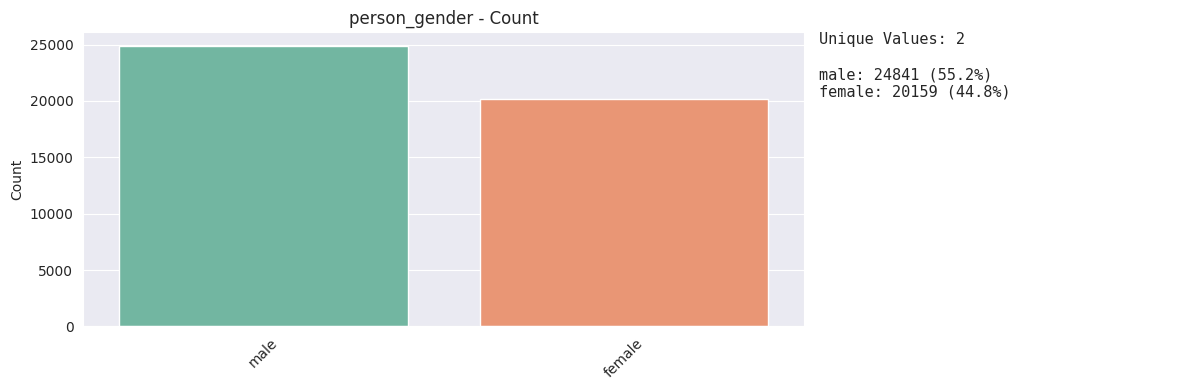

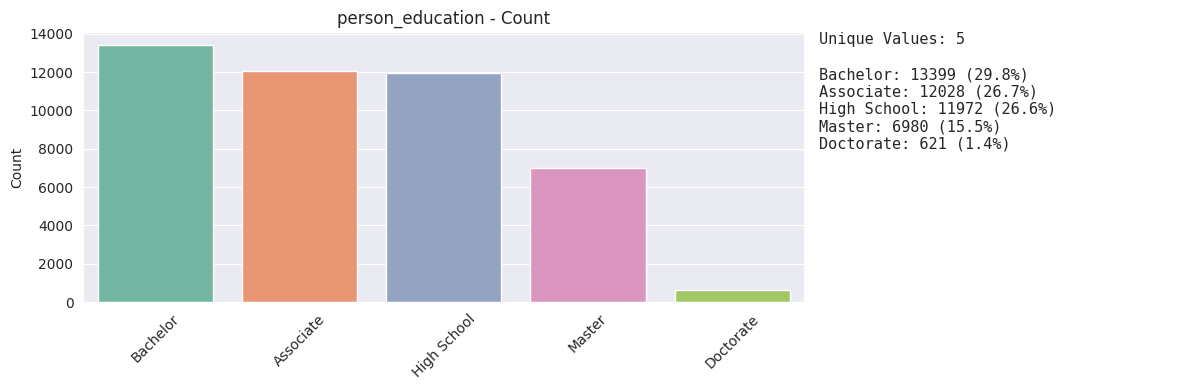

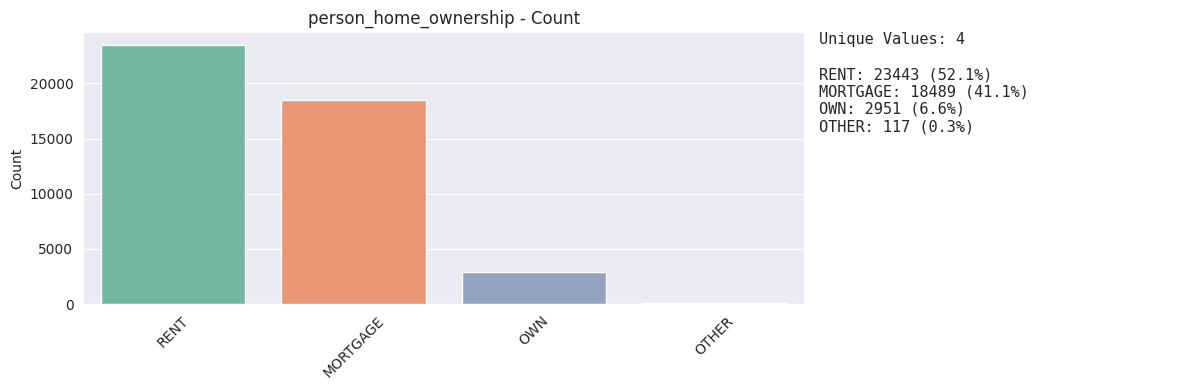

In [ ]:
analyze_categorical(df,['person_gender','person_education','person_home_ownership'])

# The conclusions from the first part are that most loan applicants are recent graduates and students, unlike those with PhDs or master's degrees, and also include renters and individuals with mortgaged properties. üìä

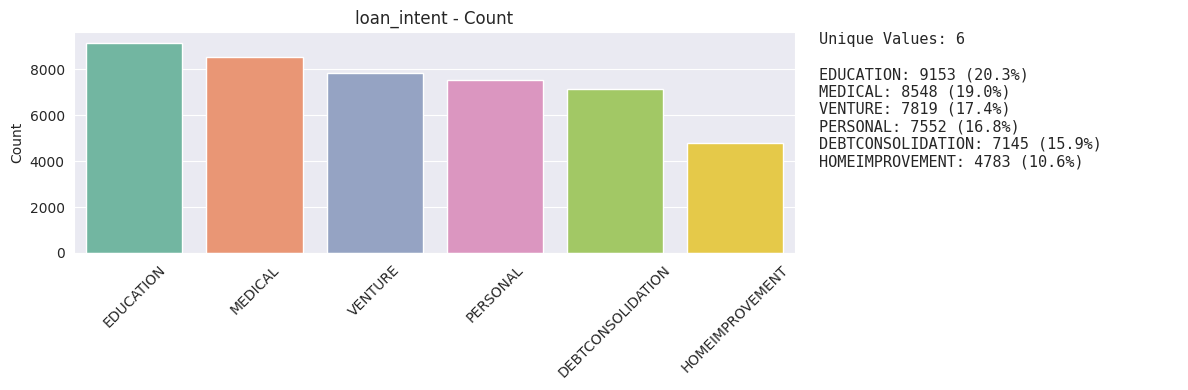

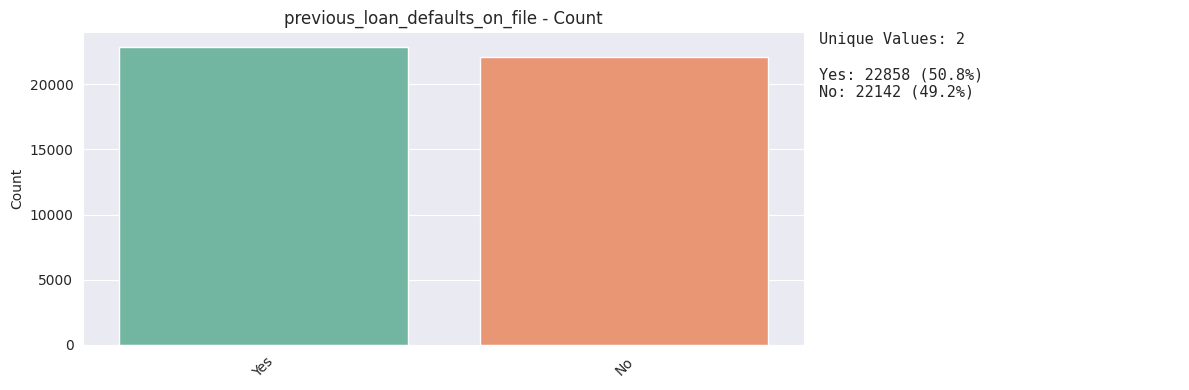

In [ ]:
analyze_categorical(df,['loan_intent','previous_loan_defaults_on_file'])

# **It seems there is a convergence among loan request categories, with a slight lead for education. üéì**

In [ ]:
df.head()

person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0             0.0   
1        21.0        female      High School        12282.0             0.0   
2        25.0        female      High School        12438.0             3.0   
3        23.0        female         Bachelor        79753.0             0.0   
4        24.0          male           Master        66135.0             1.0   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT     8000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT     8000.0     MEDICAL          15.23   
4                  RENT     8000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.12                         3.0         561.0   
1                 0.08                         2.0         504.0   
2                 0.12                         3.0         635.0   
3                 0.12                         2.0         675.0   
4                 0.12                         4.0         586.0   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

# **multi varient analysis**

**Now I will conduct a multivariate analysis with a target column üòÑ**

In [ ]:
def hue_categorical_analysis(df, cat_col, target_col):
   for col in cat_col:
        plt.figure(figsize=(12, 4))
        sns.countplot(data=df, x=col, hue=target_col, palette='Pastel1', order=df[col].value_counts().index)
        plt.title(f'{col} by {target_col}')
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45)

        plt.legend(title=target_col, loc='upper right', bbox_to_anchor=(1, 1.15))

        plt.tight_layout()
        plt.show()

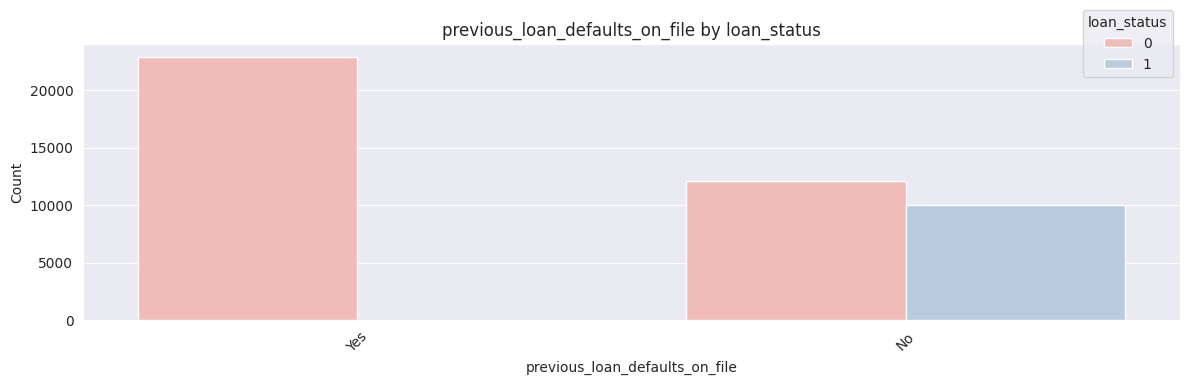

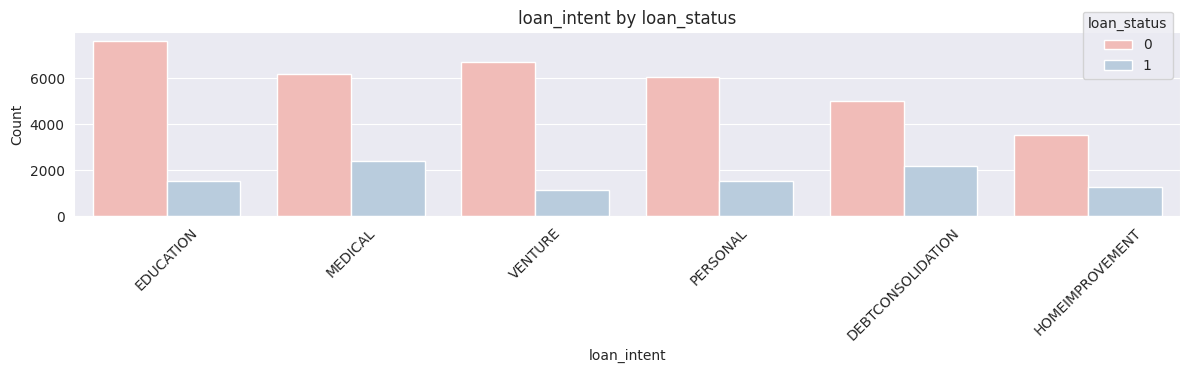

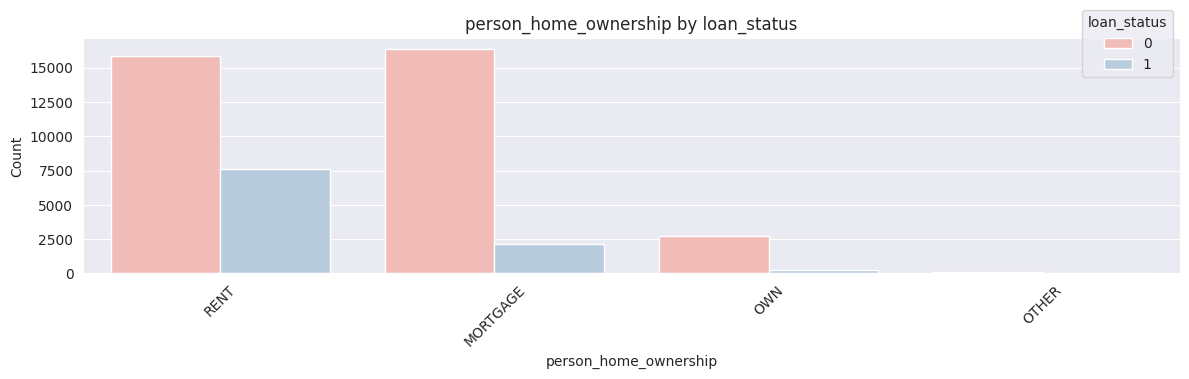

In [ ]:
import_cat_col=['previous_loan_defaults_on_file','loan_intent','person_home_ownership']
hue_categorical_analysis(df,import_cat_col,'loan_status')

# **The important indicator derived is that anyone who defaults on any loan repayments will not have their request approved üö®**

In [ ]:
def hue_numeric_analysis(df, num_cols, target_col):
    for col in num_cols:
        plt.figure(figsize=(12, 4))
        sns.kdeplot(
            data=df, x=col, hue=target_col,
            fill=True, common_norm=False, palette='Pastel1', alpha=0.6
        )
        plt.title(f'Distribution of {col} by {target_col}')
        plt.xlabel(col)
        plt.ylabel('Density')

        plt.legend(title=target_col, loc='upper right', bbox_to_anchor=(1, 1.15))

        plt.tight_layout()
        plt.show()

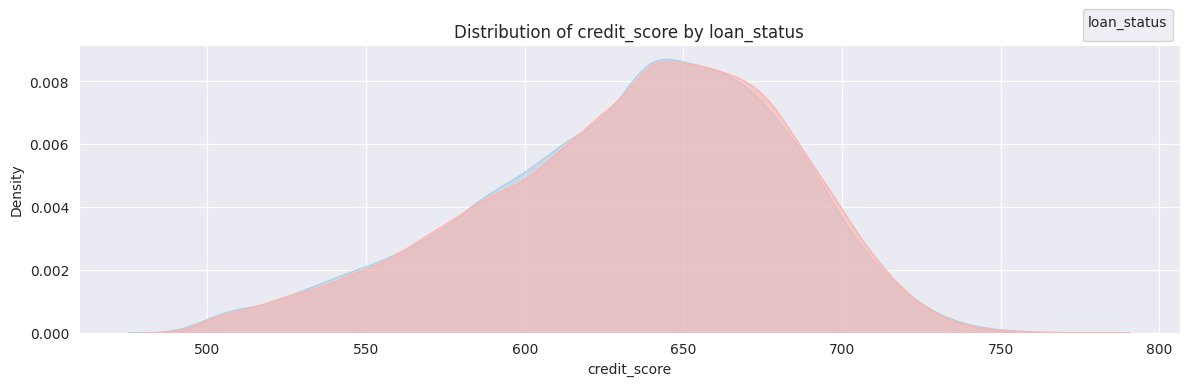

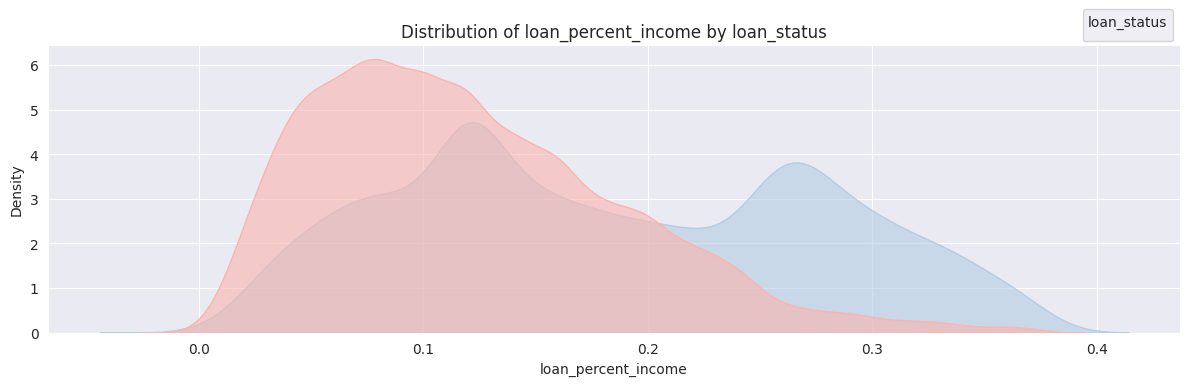

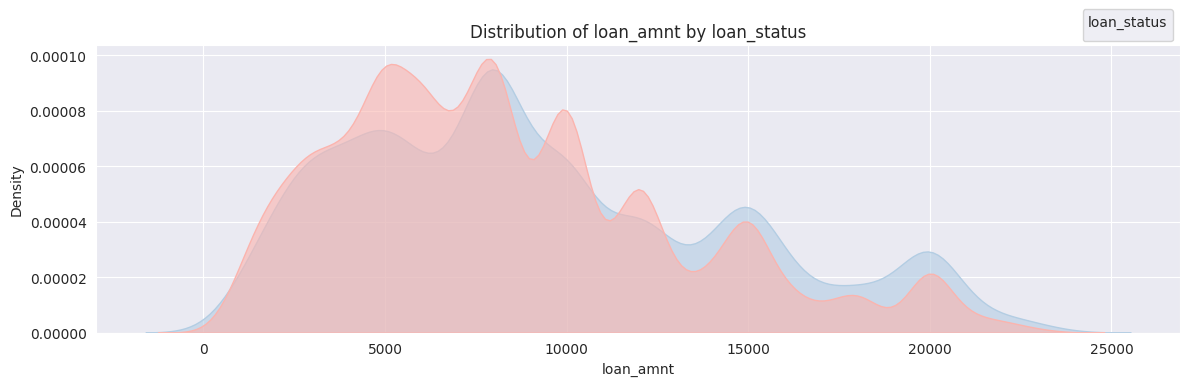

In [ ]:
import_num_cols = ['credit_score', 'loan_percent_income', 'loan_amnt']
hue_numeric_analysis(df,import_num_cols,'loan_status')

# **Transformation For The  Data**

In [ ]:
df.head()

person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0             0.0   
1        21.0        female      High School        12282.0             0.0   
2        25.0        female      High School        12438.0             3.0   
3        23.0        female         Bachelor        79753.0             0.0   
4        24.0          male           Master        66135.0             1.0   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT     8000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT     8000.0     MEDICAL          15.23   
4                  RENT     8000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.12                         3.0         561.0   
1                 0.08                         2.0         504.0   
2                 0.12                         3.0         635.0   
3                 0.12                         2.0         675.0   
4                 0.12                         4.0         586.0   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

In [ ]:
edu_order = [['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate']]
encoder = OrdinalEncoder(categories=edu_order)

df[['person_education']] = encoder.fit_transform(df[['person_education']])

In [ ]:
le = LabelEncoder()
df['person_gender'] = le.fit_transform(df['person_gender'])
df['previous_loan_defaults_on_file'] = le.fit_transform(df['previous_loan_defaults_on_file'])

In [ ]:
display(df.head())

person_age  person_gender  person_education  person_income  person_emp_exp  \
0        22.0              0               3.0        71948.0             0.0   
1        21.0              0               0.0        12282.0             0.0   
2        25.0              0               0.0        12438.0             3.0   
3        23.0              0               2.0        79753.0             0.0   
4        24.0              1               3.0        66135.0             1.0   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT     8000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT     8000.0     MEDICAL          15.23   
4                  RENT     8000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.12                         3.0         561.0   
1                 0.08                         2.0         504.0   
2                 0.12                         3.0         635.0   
3                 0.12                         2.0         675.0   
4                 0.12                         4.0         586.0   

   previous_loan_defaults_on_file  loan_status  
0                               0            1  
1                               1            0  
2                               0            1  
3                               0            1  
4                               0            1

In [ ]:
X=df.drop('loan_status',axis=1)
y=df['loan_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
scaler=RobustScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, num_col),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_col)
    ],
    remainder='passthrough'
)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# **feature_selection**

In [ ]:
from sklearn.feature_selection import RFE
# ÿ¨ÿßŸáÿ≤ ÿ™ÿ≥ÿ™ÿÆÿØŸÖŸáŸÖ
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(kernel='linear')
}

results = []

for name, model in models.items():
    print(f'\nRunning RFE with {name}...')
    rfe = RFE(estimator=model, n_features_to_select=10)
    X_train_rfe = rfe.fit_transform(X_train_transformed, y_train)
    X_test_rfe = rfe.transform(X_test_transformed)


    model.fit(X_train_rfe, y_train)
    y_pred = model.predict(X_test_rfe)
    acc = accuracy_score(y_test, y_pred)

    results.append((name, acc))
    print(f'Accuracy: {acc:.4f}')


Running RFE with LogisticRegression...
Accuracy: 0.8761

Running RFE with RandomForest...
Accuracy: 0.9158

Running RFE with SVM...
Accuracy: 0.8842


In [ ]:
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier

xgb = XGBClassifier()
rfe_xgb = RFE(estimator=xgb, n_features_to_select=10)
X_train_rfe_xgb = rfe_xgb.fit_transform(X_train_transformed, y_train)
X_test_rfe_xgb = rfe_xgb.transform(X_test_transformed)

In [ ]:
print(X_train_rfe.shape)
print(X_train_rfe_xgb.shape)

(36000, 10)
(36000, 10)


# **Grid search**

In [ ]:

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}


In [ ]:
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

svm_grid = GridSearchCV(
    SVC(),
    svm_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

In [ ]:
rf_grid.fit(X_train_rfe, y_train)
svm_grid.fit(X_train_rfe, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [ ]:
print("Best RF Params:", rf_grid.best_params_)
print("Best RF Score:", rf_grid.best_score_)

print("Best SVM Params:", svm_grid.best_params_)
print("Best SVM Score:", svm_grid.best_score_)

Best RF Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best RF Score: 0.9209999999999999
Best SVM Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVM Score: 0.9076666666666666


In [ ]:
rf_y_pred=rf_grid.predict(X_test_rfe)
rf_test_acc = accuracy_score(y_test,rf_y_pred)
svm_y_pred=svm_grid.predict(X_test_rfe)
svm_test_acc = accuracy_score(y_test, svm_y_pred)

print("Random Forest Test Accuracy:", rf_test_acc)
print("SVM Test Accuracy:", svm_test_acc)

Random Forest Test Accuracy: 0.9216666666666666
SVM Test Accuracy: 0.9092222222222223


In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8, 1]
}


xgb_grid = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_params,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)
xgb_grid.fit(X_train_rfe_xgb, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.05, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200], 'subsample': [0.8]},
             scoring='accuracy', verbose=1)

In [ ]:
y_pred=xgb_grid.predict(X_test_rfe_xgb)
print(f"XGB TEST SCORE ={accuracy_score(y_test,y_pred)}")
y_pred_train=xgb_grid.predict(X_train_rfe_xgb)
print(f"XGB Train SCORE ={accuracy_score(y_train,y_pred_train)}")

XGB TEST SCORE =0.9326666666666666
XGB Train SCORE =0.9535277777777778


# **XGB  is winning üèÜ.**

<Axes: >

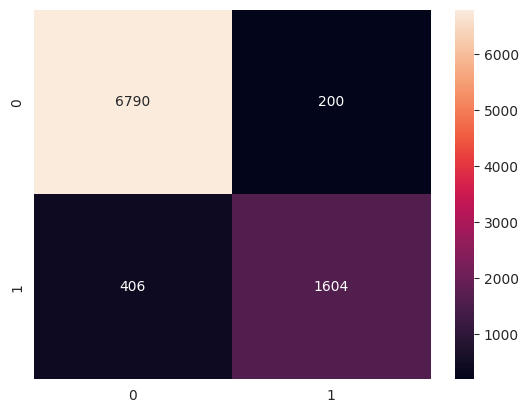

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='g')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.89      0.80      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.88      0.90      9000
weighted avg       0.93      0.93      0.93      9000



In [ ]:
feature_importances = xgb_grid.best_estimator_.feature_importances_

selected_feature_names = preprocessor.get_feature_names_out()[rfe_xgb.support_]

feature_importance_df = pd.DataFrame({
        'Feature': selected_feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
feature_importance_df

Feature  Importance
3  num__previous_loan_defaults_on_file    0.895421
5      cat__person_home_ownership_RENT    0.025734
4       cat__person_home_ownership_OWN    0.018455
2             num__loan_percent_income    0.012905
7     cat__loan_intent_HOMEIMPROVEMENT    0.009480
1                   num__loan_int_rate    0.009034
0                   num__person_income    0.008389
9             cat__loan_intent_VENTURE    0.008065
8             cat__loan_intent_MEDICAL    0.006550
6   cat__loan_intent_DEBTCONSOLIDATION    0.005966

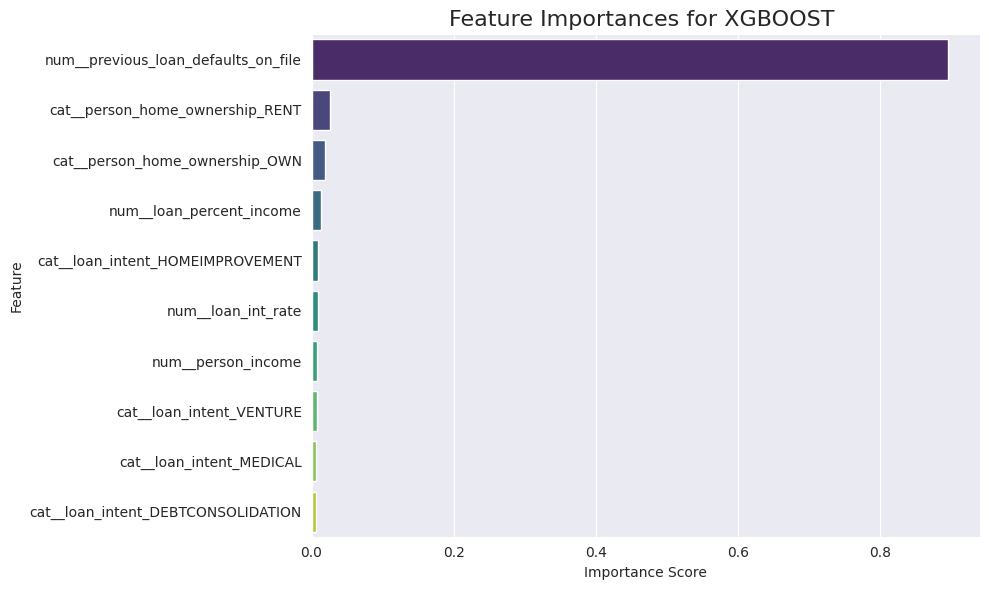

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances for XGBOOST ',fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
import joblib
joblib.dump(xgb_grid, 'Loan classification')

['Loan classification']

In [ ]:
df.select_dtypes